<a href="https://colab.research.google.com/github/MiguelAngeloTr/Deep_Learning/blob/main/C1/Semana_3__Concrete_Compressive_Strength_RNA_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

### Procesamiento del dataset --> Concrete Compressive Strength

# Problem

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [ ]:
data = pd.read_excel('Concrete_Data.xlsx')
print(data.shape)
data.head(10)

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
data['Cement (component 1)(kg in a m^3 mixture)']

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: Cement (component 1)(kg in a m^3 mixture), Length: 1030, dtype: float64

In [ ]:
data.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength']
data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
data = data.rename(columns={'Cement':'cement'})
data.head(5)

,cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Verificar si existen valores nulos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
data.isnull().sum()

cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb57d7590d0>,
      dtype=object)

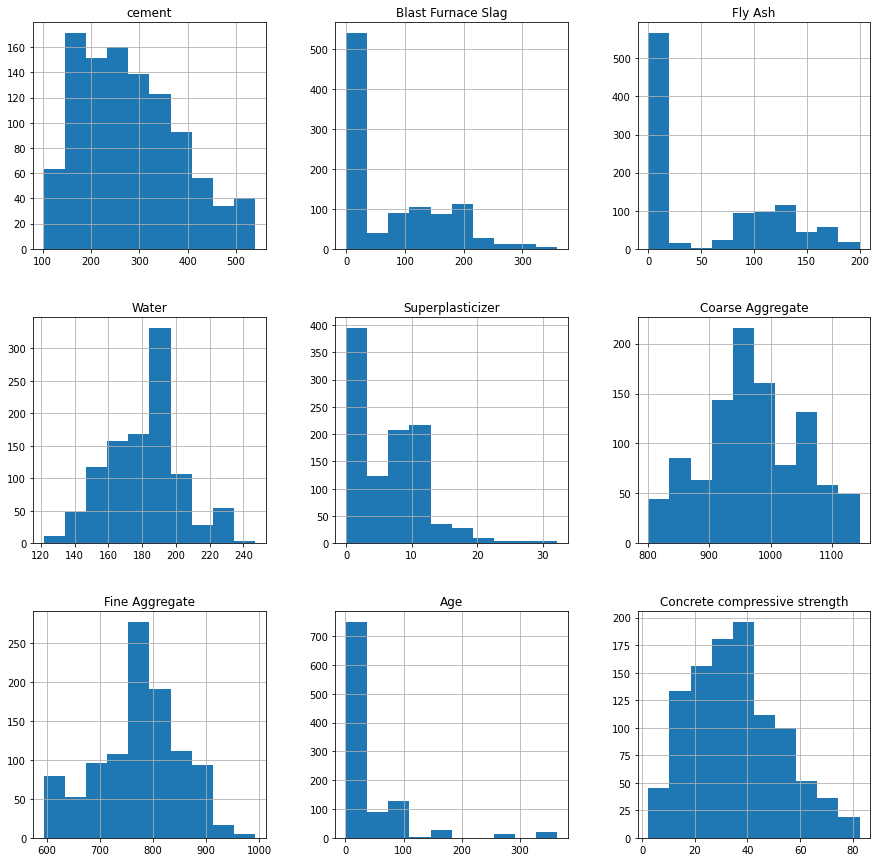

In [ ]:
data.hist(figsize=(15,15))

### Normalización de los datos

In [ ]:
def normalizar(x,xmax,xmin,ymax,ymin):
  m = (ymax-ymin)/(xmax-xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
max = np.max(data).values
min = np.min(data).values
data2 = normalizar(data,max,min,1,0)
data2.head(10)

,cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806
5,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.244505,0.556864
6,0.634703,0.264329,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.515358
7,0.634703,0.264329,0.0,0.848303,0.00000,0.380814,0.000000,0.074176,0.425029
8,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.074176,0.542219
9,0.851598,0.000000,0.0,0.848303,0.00000,0.380814,0.000000,0.074176,0.460436


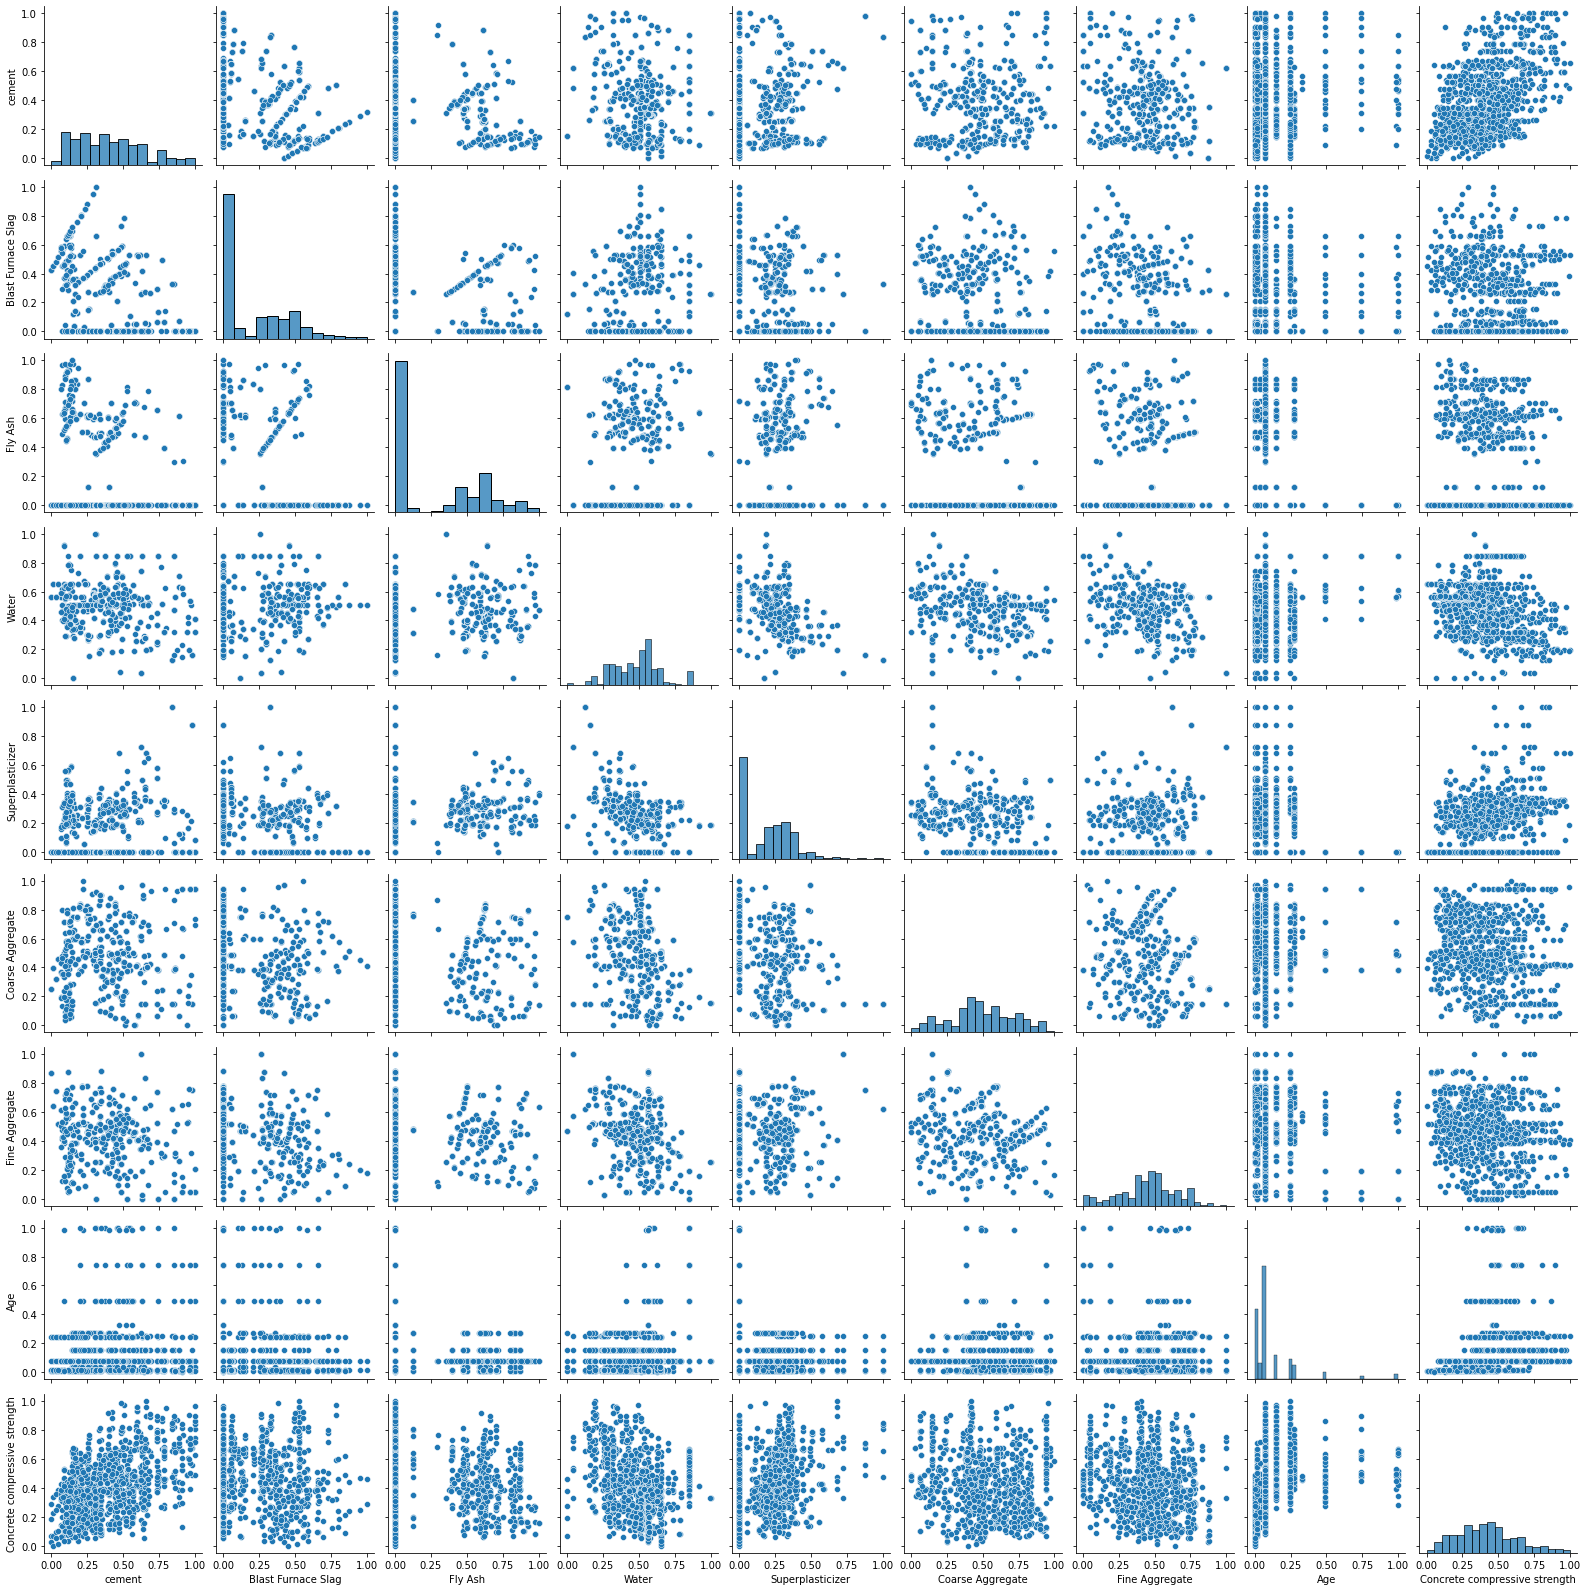

In [ ]:
sn.pairplot(data2)

In [ ]:
corr = data2.corr()
print(corr)

                                 cement  ...  Concrete compressive strength
cement                         1.000000  ...                       0.497833
Blast Furnace Slag            -0.275193  ...                       0.134824
Fly Ash                       -0.397475  ...                      -0.105753
Water                         -0.081544  ...                      -0.289613
Superplasticizer               0.092771  ...                       0.366102
Coarse Aggregate              -0.109356  ...                      -0.164928
Fine Aggregate                -0.222720  ...                      -0.167249
Age                            0.081947  ...                       0.328877
Concrete compressive strength  0.497833  ...                       1.000000

[9 rows x 9 columns]


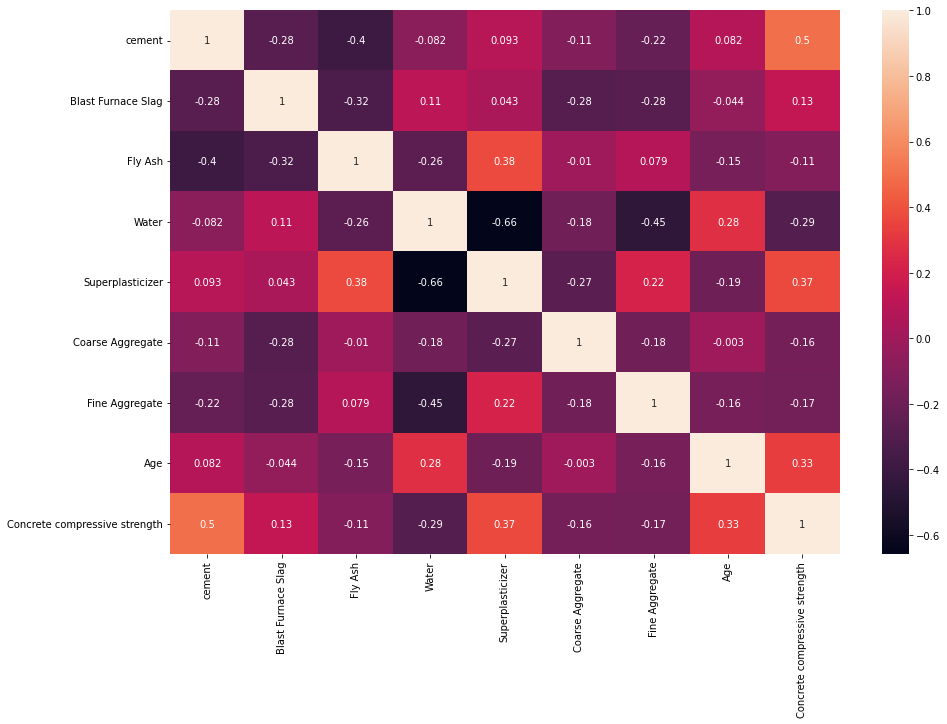

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot=True)
plt.show()

## Paso a paso para la creación del modelo MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
target = data2['Concrete compressive strength'].values#y_train
data3 = data2.drop(['Concrete compressive strength'], axis=1)

print(target.shape)
print(data3.shape)

(1030,)
(1030, 8)


### Separar datos de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42

x_train,x_test,y_train,y_test = train_test_split(data3, target, test_size=0.2, random_state=seed)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 8)
(824,)
(206, 8)
(206,)


In [ ]:
input_dim = x_train.shape[1]
num_clases = 1
lr = 1e-3
EPOCHS = 800
loss = 'mse'#'mean_squared_error'

### Crear arquitectura del modelo

In [ ]:
def model():
  model = Sequential()
  model.add(Dense(32, input_dim = input_dim, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.SGD(learning_rate=lr)

  model.compile(loss = loss, optimizer = opt)

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


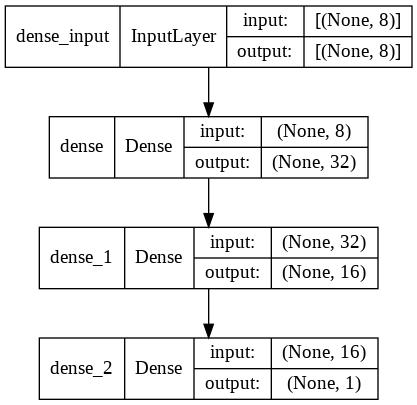

In [ ]:
model = model()
plot_model(model, to_file='model.jpg', show_shapes=True)

# Model

### Entrenar modelo

In [ ]:
loss = []
loss_val = []
epochs = 1

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=32, verbose=0)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

loss.append(history.history['loss'][0])
loss_val.append(history.history['val_loss'][0])

print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])

epochs += 1

while loss_val[len(loss_val)-1] > 0.0053: #  Se compara el varlo de la última posición de loss_val
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=32, verbose=0)
  loss.append(history.history['loss'][0])
  loss_val.append(history.history['val_loss'][0])
  print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])
  epochs += 1

Streaming output truncated to the last 5000 lines.
Epoch:  24768 loss: 0.003981988877058029 val_loss: 0.005387208424508572
Epoch:  24769 loss: 0.003982017748057842 val_loss: 0.005405382253229618
Epoch:  24770 loss: 0.0039839837700128555 val_loss: 0.005395735148340464
Epoch:  24771 loss: 0.003983310889452696 val_loss: 0.005388989113271236
Epoch:  24772 loss: 0.003982307855039835 val_loss: 0.00538979098200798
Epoch:  24773 loss: 0.003984187263995409 val_loss: 0.005397038534283638
Epoch:  24774 loss: 0.00398738868534565 val_loss: 0.005397841800004244
Epoch:  24775 loss: 0.003983688540756702 val_loss: 0.005417226813733578
Epoch:  24776 loss: 0.003984259907156229 val_loss: 0.0053934999741613865
Epoch:  24777 loss: 0.00398224825039506 val_loss: 0.005398834589868784
Epoch:  24778 loss: 0.0039832028560340405 val_loss: 0.005385533906519413
Epoch:  24779 loss: 0.003984773065894842 val_loss: 0.0053824326023459435
Epoch:  24780 loss: 0.00398489972576499 val_loss: 0.005393668077886105
Epoch:  24781

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(score)

0.005298493430018425


### Gráficar Epochs vs Loss

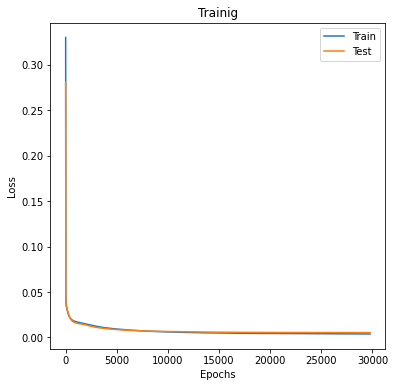

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(loss)
plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Training')
plt.show()

In [ ]:
outputTest = model.predict(x_test)
print(outputTest.shape)

(206, 1)


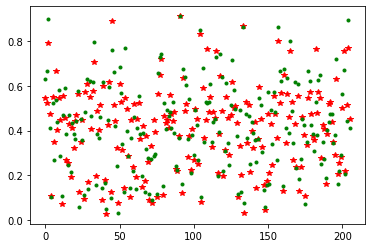

In [ ]:
plt.figure()
plt.plot(outputTest, '*r',y_test, '.g')